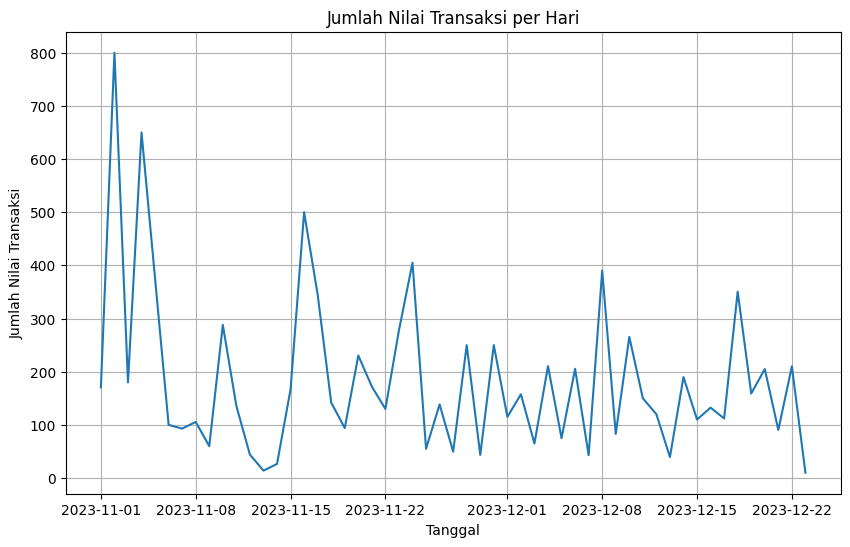

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests

# Mengambil data dari URL
url = "https://gist.githubusercontent.com/nadirbslmh/8fc9cc6cd5cbaaf5cbff63b090fb497e/raw/a7bf3e1edab88b04314a40a9de3ed744bc86d0e9/ecommerce.json"
response = requests.get(url)
data = json.loads(response.text)

# Membuat DataFrame dari data JSON
df = pd.DataFrame(data)

# Mengubah kolom 'transaction_date' menjadi tipe data datetime dengan format 'DD-MM-YYYY'
df['transaction_date'] = pd.to_datetime(df['transaction_date'], dayfirst=True)

# Jumlah nilai transaksi per hari
plt.figure(figsize=(10, 6))
df.groupby(df['transaction_date'].dt.date)['transaction_amount'].sum().plot()
plt.title('Jumlah Nilai Transaksi per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Nilai Transaksi')
plt.grid(True)
plt.show()

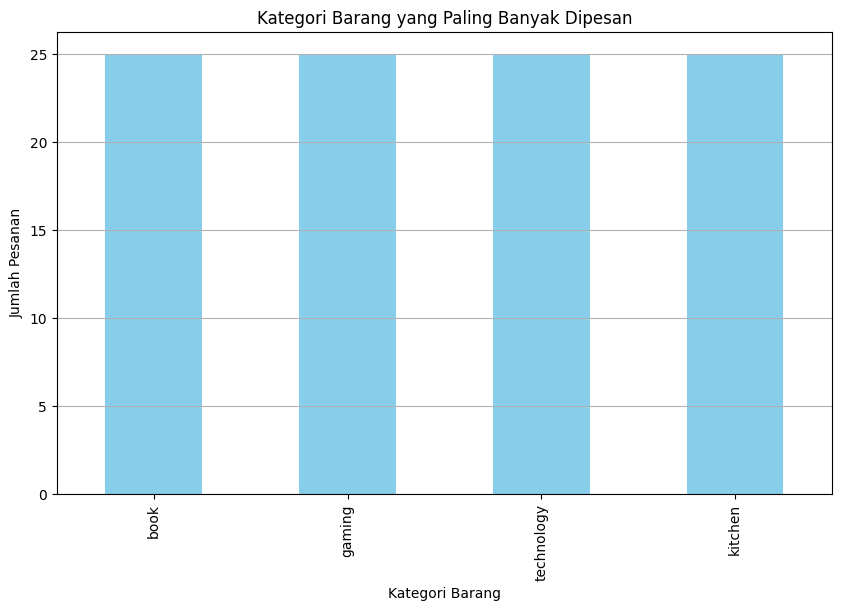

In [3]:
# Kategori barang yang paling banyak dipesan
plt.figure(figsize=(10, 6))
df['item_category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Kategori Barang yang Paling Banyak Dipesan')
plt.xlabel('Kategori Barang')
plt.ylabel('Jumlah Pesanan')
plt.grid(axis='y')
plt.show()

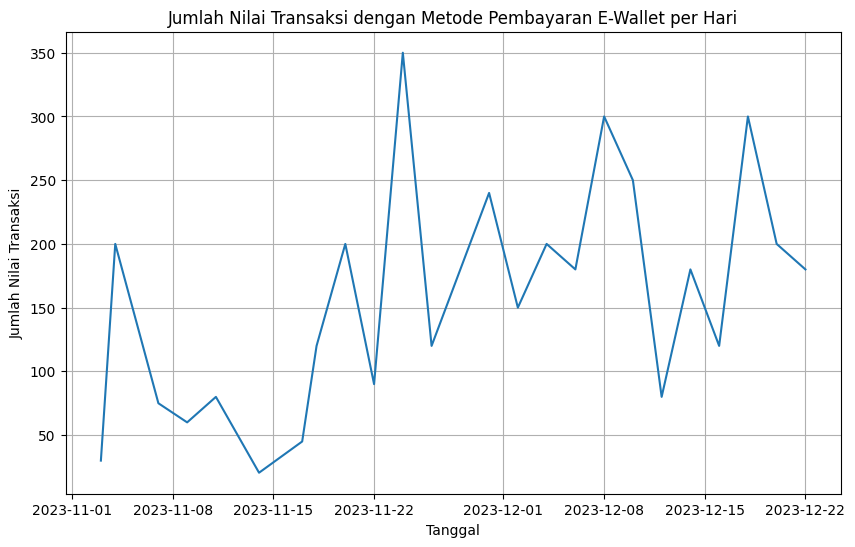

In [5]:
# Jumlah nilai transaksi dengan metode pembayaran e-wallet
plt.figure(figsize=(10, 6))
df[df['payment_method'] == 'e wallet'].groupby(df['transaction_date'].dt.date)['transaction_amount'].sum().plot()
plt.title('Jumlah Nilai Transaksi dengan Metode Pembayaran E-Wallet per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Nilai Transaksi')
plt.grid(True)
plt.show()

In [6]:
# Nilai maksimal, minimal, dan median dari jumlah nilai transaksi
max_value = df['transaction_amount'].max()
min_value = df['transaction_amount'].min()
median_value = df['transaction_amount'].median()

print("Nilai Maksimal: ", max_value)
print("Nilai Minimal: ", min_value)
print("Nilai Median: ", median_value)

Nilai Maksimal:  800.0
Nilai Minimal:  5.0
Nilai Median:  47.5
